# Scikit-Learn的应用

## 01 加载数据集

In [1]:
from sklearn import datasets
digits = datasets.load_digits()

digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [2]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [3]:
print(digits.target)
digits.images[0]

[0 1 2 ... 8 9 8]


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

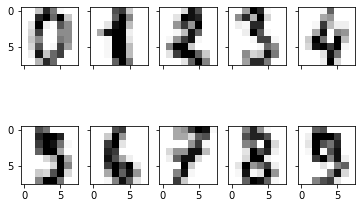

In [5]:
# 显示数据
from matplotlib import pyplot as plt

fig, ax = plt.subplots(
    nrows=2,
    ncols=5,
    sharex=True,
    sharey=True)
 
ax = ax.flatten()
for i in range(10):
    ax[i].imshow(digits.data[i].reshape((8, 8)), cmap='Greys', interpolation='nearest')
plt.show()

## 02 模型训练和预测

SVM

In [6]:
from sklearn import svm
clf = svm.SVC(gamma = 0.001, C=100)

clf.fit(digits.data[:-1], digits.target[:-1])   # 用digits.data[:-1], digits.target[:-1]作为训练数据训练clf

SVC(C=100, gamma=0.001)

In [11]:
clf.predict(digits.data[:3])  # 训练好的clf模型对digits.data[:2]的预测结果

array([0, 1, 2])

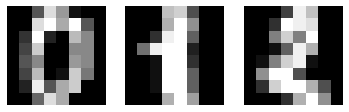

In [13]:
images = digits.data[:3]

fig, axes = plt.subplots(nrows=1, ncols=3)

for i, ax in enumerate(axes):
    # 将图像数据重新调整为8x8的矩阵形状
    image = images[i].reshape(8, 8)
    # 显示图像
    ax.imshow(image, cmap='gray')
    ax.axis('off')

# 展示图像
plt.show()

朴素贝叶斯

In [35]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(digits.data[:-1], digits.target[:-1])

MultinomialNB()

In [37]:
model.predict(digits.data[2:5])

array([1, 3, 4])

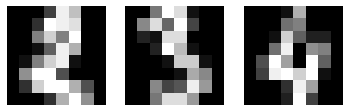

In [38]:
images = digits.data[2:5]

fig, axes = plt.subplots(nrows=1, ncols=3)

for i, ax in enumerate(axes):
    # 将图像数据重新调整为8x8的矩阵形状
    image = images[i].reshape(8, 8)
    # 显示图像
    ax.imshow(image, cmap='gray')
    ax.axis('off')

# 展示图像
plt.show()

神经网络

In [43]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(solver='adam', activation='relu',alpha=1e-4,
                     hidden_layer_sizes=(512,), random_state=1, max_iter=10,
                     verbose=1, learning_rate_init=0.1)

mlpc.fit(digits.data[:-10], digits.target[:-10])

Iteration 1, loss = 22.46094368
Iteration 2, loss = 4.70572820
Iteration 3, loss = 1.58970383
Iteration 4, loss = 1.24468204
Iteration 5, loss = 0.98084709
Iteration 6, loss = 0.80614623
Iteration 7, loss = 0.70919658
Iteration 8, loss = 0.61886006
Iteration 9, loss = 0.55994247
Iteration 10, loss = 0.48754458


D:\python\conda\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(512,), learning_rate_init=0.1, max_iter=10,
              random_state=1, verbose=1)

In [44]:
mlpc.predict(digits.data[5:8])

array([9, 6, 7])

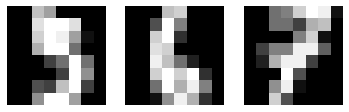

In [45]:
images = digits.data[5:8]

fig, axes = plt.subplots(nrows=1, ncols=3)

for i, ax in enumerate(axes):
    # 将图像数据重新调整为8x8的矩阵形状
    image = images[i].reshape(8, 8)
    # 显示图像
    ax.imshow(image, cmap='gray')
    ax.axis('off')

# 展示图像
plt.show()

## 03 模式测试

用测试数据计算准确率，注意要使用训练阶段未使用过的数据

In [49]:
# 计算对测试数据的预测准确率
def cal_accuracy(prediction, y_test):
    right = 0
    total = 0
    for i in range(len(y_test)):
        total += 1
        if prediction[i] == y_test[i]:
            right += 1
    acc = right / total
    
    return acc

pred = mlpc.predict(digits.data[-10:])
acc = cal_accuracy(digits.target[-10:], pred)
print(acc)
print('ground truth: ', digits.target[-10:])
print('pred: ', pred)

0.7
ground truth:  [5 4 8 8 4 9 0 8 9 8]
pred:  [5 4 7 1 4 9 0 8 7 8]


## 数据稀疏表示

随机映射 random projection

sklearn.random_projection 模块实现了一种简单和计算高效的方法，通过交易控制量的精度（作为附加方差），以缩短数据的维数，从而缩短处理时间和缩小模型大小。

该模块实现两种类型的非结构化随机矩阵：高斯随机矩阵 GaussianRandomProjection 和稀疏随机矩阵 SparseRandomProjection。

- 高斯随机矩阵：通过将原始输入空间投影在随机生成的矩阵上来降低维度。
- 稀疏随机矩阵：相比于高斯随机映射，稀疏随机映射会更能保证降维的质量，并带来内存的使用效率和运算效率。

In [33]:
import numpy as np
from sklearn import random_projection
rng = np.random.RandomState(0)
X = rng.rand(10, 4000)  # 生成10x4000的随机数组
X = np.array(X, dtype='float32')
X

array([[0.5488135 , 0.71518934, 0.60276335, ..., 0.83000296, 0.9328062 ,
        0.30833843],
       [0.29264206, 0.56651825, 0.13741443, ..., 0.8018282 , 0.5391446 ,
        0.8372185 ],
       [0.4577597 , 0.3769177 , 0.7023351 , ..., 0.84348094, 0.9429093 ,
        0.83282244],
       ...,
       [0.9977274 , 0.5772973 , 0.10531813, ..., 0.23887452, 0.8411705 ,
        0.10988224],
       [0.366182  , 0.3506383 , 0.40236744, ..., 0.90022343, 0.49806663,
        0.77000207],
       [0.1620572 , 0.23990296, 0.4880867 , ..., 0.5882239 , 0.4246149 ,
        0.90163267]], dtype=float32)

In [34]:
transformer1 = random_projection.GaussianRandomProjection()
X_new = transformer1.fit_transform(X)

print(X_new.dtype)
X_new.shape

float64


(10, 1973)

In [ ]:
transformer2 = random_projection.SparseRandomProjection()
X_new = transformer2.fit_transform(X)

print(X_new.dtype)
X_new.shape